# Analyzing Merging BBH Populations: Rates & Observations 🔍

If you haven't done so yet, export the path POSYDON environment variables.

In [1]:
%env PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
%env PATH_TO_POSYDON_DATA=/Volumes/T7/

env: PATH_TO_POSYDON=/Users/simone/Google Drive/github/POSYDON-public/
env: PATH_TO_POSYDON_DATA=/Volumes/T7/


We want to analyze the BBH population data we generated in the previous notebook. We will build a model that predicts the intrinsic and observable BBH population in the Universe. Please refer to the paper for more details about the procedure inolved in the convolution of the BBH synthetic popluation, i.e. the POSYDON population of merging BBH at the time of formation, with the star-formation history of the Universe and the selection effects of the gravitational-wave detector network.

In the first step, we load population parameters ini file and the parsed BBH population data from the previous notebook into the Synthetic Population class. 

NOTE: In case you did not install mpi4py in your environment, set `use_MPI=False` in the `population_params.ini` to prevent the SyntheticPopulation class to load the module and trowing an error.

In [2]:
import os
from config import PATH_TO_POSYDON_DATA
from posydon.popsyn.synthetic_population import SyntheticPopulation

# cosmological model parameters for the rate calculation
MODEL = {
    'delta_t' : 100, # Myr
    'SFR' : 'IllustrisTNG',
    'sigma_SFR' : None,
    'Z_max' : 1.,
    'Zsun' : 0.0142
}

pop = SyntheticPopulation('./population_params.ini', verbose=True, MODEL=MODEL)
path = os.path.join(PATH_TO_POSYDON_DATA, "POSYDON_data/tutorials/population-synthesis/example/")
pop.load_pop(os.path.join(path,'BBH_population.h5'))

pop.df.head(10)
# pop.df_oneline(10)

Population successfully loaded!


,state,event,time,orbital_period,eccentricity,lg_mtransfer_rate,step_names,step_times,S1_state,S1_mass,...,S2_co_core_radius,S2_center_h1,S2_center_he4,S2_surface_h1,S2_surface_he4,S2_surf_avg_omega_div_omega_crit,S2_spin,metallicity,simulated_mass_for_met,underlying_mass_for_met
binary_index,,,,,,,,,,,,,,,,,,,,,
3587,detached,ZAMS,0.000000e+00,2.493602e+01,0.000000,NaN,initial_cond,0.000000,H-rich_Core_H_burning,70.069756,...,NaN,7.155000e-01,2.703000e-01,NaN,NaN,NaN,NaN,0.0142,2.913438e+07,1.447893e+08
3587,contact,oDoubleCE1,3.631450e+06,6.304073e+01,0.000000,-2.989131,step_HMS_HMS,0.037464,H-rich_Core_He_burning,44.118926,...,0.000000,0.000000e+00,9.828315e-01,4.246537e-01,0.561493,0.577444,0.760854,0.0142,2.913438e+07,1.447893e+08
3587,detached,NaN,3.631450e+06,2.371597e-01,0.000000,NaN,step_CE,0.000137,stripped_He_Core_He_burning,35.566786,...,0.000000,0.000000e+00,9.828315e-01,1.000000e-02,0.975800,NaN,NaN,0.0142,2.913438e+07,1.447893e+08
3587,detached,CC1,4.007490e+06,1.226986e+00,0.000000,NaN,step_detached,0.777758,stripped_He_Central_C_depletion,13.620462,...,0.401483,1.917729e-34,1.605147e-02,9.893273e-100,0.247607,0.006843,0.077976,0.0142,2.913438e+07,1.447893e+08
3587,detached,NaN,4.007490e+06,1.358968e+00,0.101109,NaN,step_SN,0.152370,BH,13.120462,...,0.401483,1.917729e-34,1.605147e-02,9.893273e-100,0.247607,0.006843,0.077976,0.0142,2.913438e+07,1.447893e+08
3587,detached,redirect,4.007490e+06,1.358968e+00,0.101109,NaN,step_CO_HeMS,0.000102,BH,13.120462,...,0.401483,1.917729e-34,1.605147e-02,9.893273e-100,0.247607,0.006843,0.077976,0.0142,2.913438e+07,1.447893e+08
3587,detached,CC2,4.027170e+06,1.377894e+00,0.101108,NaN,step_detached,0.452186,BH,13.120462,...,0.130995,0.000000e+00,7.706932e-13,1.000000e-99,0.226684,0.015362,0.060340,0.0142,2.913438e+07,1.447893e+08
3587,detached,NaN,4.027170e+06,1.611464e+00,0.048133,NaN,step_SN,0.149304,BH,13.120462,...,NaN,NaN,NaN,NaN,NaN,NaN,0.064849,0.0142,2.913438e+07,1.447893e+08
3587,contact,CO_contact,2.917891e+09,2.638756e-08,0.000000,NaN,step_dco,1.252216,BH,13.120462,...,NaN,NaN,NaN,NaN,NaN,NaN,0.064849,0.0142,2.913438e+07,1.447893e+08


We now generate the synthetic BBH population buy using the `get_dco_at_formation` method. 
- The `onelie_cols` allows you to extract values stored in the oneline dataframe.
- The `formation_channel` option allows to compute the formation channels of the BBH population.

The synthetic population cann be saved to a file using the `save_synthetic_pop` method and loaded back into memory using the `load_synthetic_pop` method.

In [3]:
# generate the BBH synthetic population
pop.get_dco_at_formation(S1_state='BH', S2_state='BH', 
                         oneline_cols=['S1_natal_kick_array_0', 'S2_natal_kick_array_0'],
                         formation_channels=True)

# we can save the synthetic population
pop.save_synthetic_pop(os.path.join(path,'BBH_synthetic_population.h5'))
# pop.load_synthetic_pop(os.path.join(path,'BBH_synthetic_population.h5'))

cols = ['metallicity','time','t_delay','S1_state','S2_state','S1_mass','S2_mass','S1_spin','S2_spin', 'orbital_period','eccentricity', 'channel']
pop.df_synthetic[cols]

Computing formation channels...


/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:804: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ZAMS_oDoubleCE1_CC1_redirect_CC2_CO_contact_END' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df_oneline.loc[index,'channel_debug'] = formation_channel
/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:808: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ZAMS_oDoubleCE1_CC1_CC2_END' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df_oneline.loc[index,'channel'] = formation_channel


Synthetic population successfully saved!


/Users/simone/Google Drive/github/POSYDON-public/posydon/popsyn/synthetic_population.py:451: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['state', 'event', 'step_names', 'S1_state', 'S2_state', 'channel'], dtype='object')]

  self.df_synthetic.to_hdf(path, key='history')


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,orbital_period,eccentricity,channel
0,0.01420,4.027170,2913.863804,BH,BH,13.120462,12.911080,0.079649,0.064849,1.611464,0.048133,ZAMS_oDoubleCE1_CC1_CC2_END
1,0.01420,4.027170,1500.583774,BH,BH,13.120462,12.911080,0.079649,0.063991,1.279098,0.123592,ZAMS_oDoubleCE1_CC1_CC2_END
2,0.01420,4.849573,662.821800,BH,BH,10.330899,9.888130,0.286911,0.249267,0.817643,0.165775,ZAMS_oDoubleCE1_CC1_CC2_END
3,0.01420,4.544886,845.424610,BH,BH,11.355246,10.251920,0.320931,0.298164,1.108194,0.379450,ZAMS_oDoubleCE1_CC1_CC2_END
4,0.01420,4.530889,620.499837,BH,BH,11.436823,10.900538,0.190982,0.167996,0.830194,0.107165,ZAMS_oDoubleCE1_CC1_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...
30751,0.00639,4.585168,128.572655,BH,BH,13.380617,12.935158,0.467285,0.458164,0.507305,0.089335,ZAMS_oDoubleCE1_CC1_CC2_END
30752,0.00639,5.751690,68.017543,BH,BH,10.018834,9.020831,0.719064,0.694536,0.333537,0.155820,ZAMS_oDoubleCE1_CC1_CC2_END
30753,0.00639,6.061904,88.863012,BH,BH,20.971757,9.843552,0.068179,0.698055,0.468303,0.129531,ZAMS_CC1_oRLO2_oCE2_CC2_END
30754,0.00639,5.290004,95.405272,BH,BH,11.456069,11.171652,0.578478,0.595531,0.414186,0.102238,ZAMS_oDoubleCE1_CC1_CC2_END


We can now compute the merger efficiency of the synthetic population at a given metallicity, i.e. the number of merging DCO per unit star formation and visualize the results.

DCO merger efficiency at Z=2.84E-02: 8.34E-07 Msun^-1
DCO merger efficiency at Z=1.42E-02: 1.61E-06 Msun^-1
DCO merger efficiency at Z=6.39E-03: 5.25E-06 Msun^-1
DCO merger efficiency at Z=2.84E-03: 2.08E-05 Msun^-1
DCO merger efficiency at Z=1.42E-03: 1.83E-05 Msun^-1
DCO merger efficiency at Z=1.42E-04: 4.18E-05 Msun^-1
DCO merger efficiency at Z=1.42E-05: 5.75E-05 Msun^-1
DCO merger efficiency at Z=1.42E-06: 6.67E-05 Msun^-1


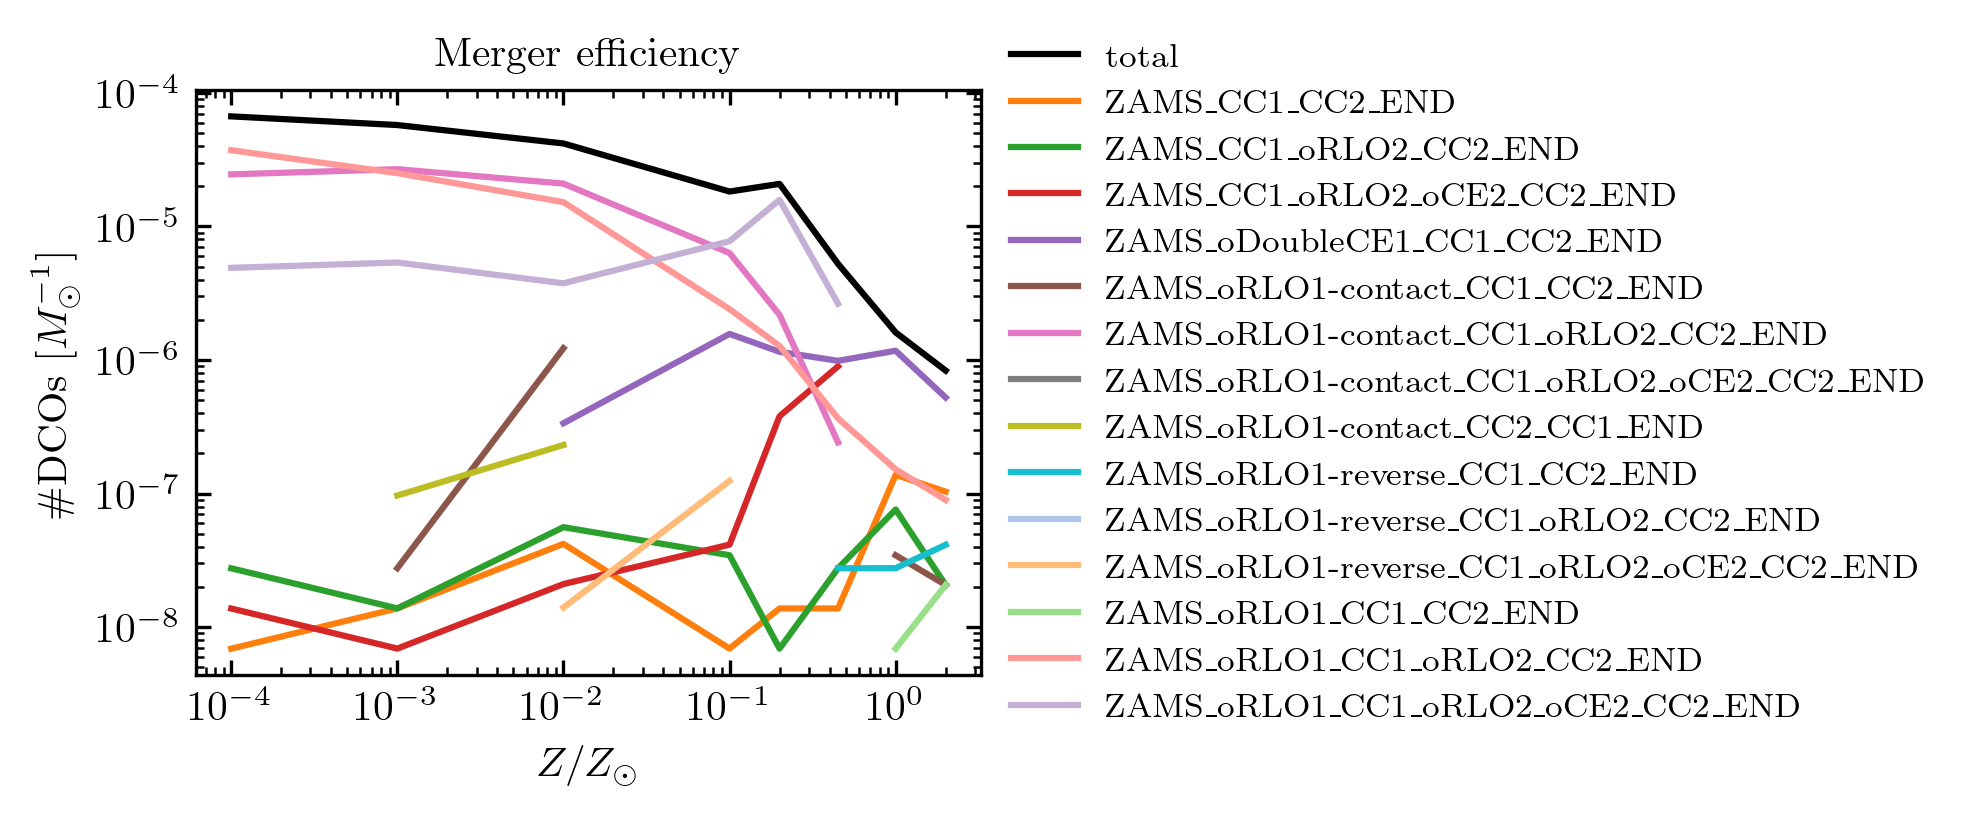

In [4]:
pop.get_dco_merger_efficiency()
pop.plot_merger_efficiency(channels=True)

We can also compute the merger rate density, i.e. the number of merging DCO per unit volume per unit time as a function of redshift. This calculation will generate a weight that can be used to reweight the synthetic population to obtain the intrinsic merging BBH population.

In [5]:
pop.get_dco_merger_rate_density()
pop.save_intrinsic_pop(os.path.join(path,'BBH_intrinsic_population.h5'))
# pop.load_intrinsic_pop(os.path.join(path,'BBH_intrinsic_population.h5'))
pop.df_dco_intrinsic[cols]

100%|██████████| 14/14 [00:38<00:00,  2.73s/it]


DCO merger rate density in the local Universe (z=0.00): 118.48 Gpc^-3 yr^-1
Intrinsic population successfully saved!


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,orbital_period,eccentricity,channel
0,0.014200,6.205715,4.287125e-08,BH,BH,12.260188,12.183039,0.050168,8.244612e-04,326.580311,0.999994,ZAMS_CC1_oRLO2_CC2_END
1,0.014200,4.705799,9.754266e-01,BH,BH,12.850735,20.143346,0.027546,5.791334e-17,2377.230212,0.999817,ZAMS_CC1_CC2_END
2,0.014200,8.187239,2.075700e+00,BH,BH,8.314851,8.315119,0.100591,6.554160e-03,38.651550,0.996045,ZAMS_oRLO1-reverse_CC1_CC2_END
3,0.014200,6.647572,2.472628e+01,BH,BH,9.826765,9.853595,0.032525,2.400078e-02,14.240625,0.980550,ZAMS_oRLO1-contact_CC1_CC2_END
4,0.014200,6.676527,1.680554e+01,BH,BH,20.974131,12.500642,0.000531,4.772162e-04,696.487802,0.998932,ZAMS_CC1_oRLO2_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...
2888053,0.000001,9.558857,1.547540e+03,BH,BH,12.404415,17.186149,0.353053,1.279050e-01,1.368867,0.072070,ZAMS_oRLO1_CC1_oRLO2_CC2_END
2888054,0.000001,5.679476,5.173339e+02,BH,BH,31.263586,34.303592,0.127590,1.671062e-01,1.495336,0.003466,ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END
2888055,0.000001,6.972682,1.105689e+04,BH,BH,22.020038,17.356224,0.156907,1.396343e-01,3.686468,0.234744,ZAMS_oRLO1_CC1_oRLO2_CC2_END
2888056,0.000001,6.442639,1.310371e+04,BH,BH,21.311099,36.473143,0.104700,1.194260e-01,4.546062,0.059527,ZAMS_oRLO1_CC1_oRLO2_CC2_END


We can now visualize the merger rate density as a function of redshift.

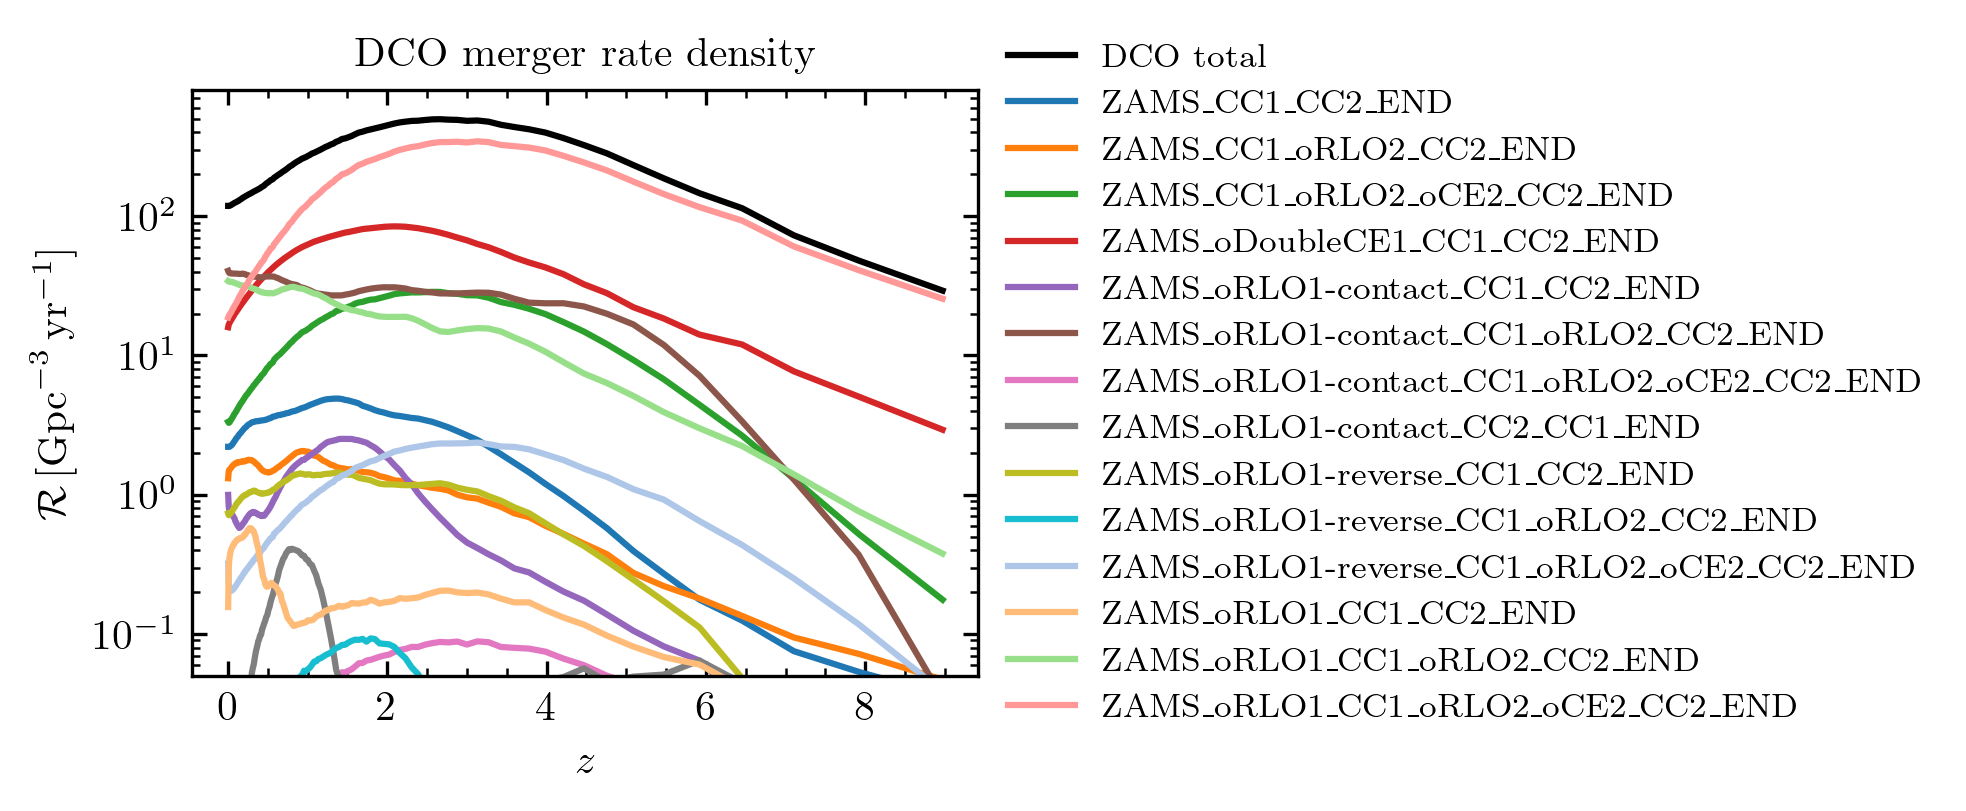

In [6]:
pop.plot_rate_density(DCO=True, channels=True, **{'ylim' : [0.05, 800]})

We can now compute the BBH detection rate. This calculation will generate a weight that can be used to reweight the synthetic population to obtain the observable merging BBH population. Here we consider a gravitational-wave detector composed of LIGO and Virgo at design sensitivity, refer to the v2 paper for further details. 

In [7]:
pop.get_dco_detection_rate(sensitivity='design_H1L1V1') # if already computed use load_data=True
pop.save_observable_pop(os.path.join(path,'BBH_observable_population.h5'))
# pop.load_observable_pop(os.path.join(path,'BBH_observable_population.h5'))
pop.df_dco_observable[cols]

100%|██████████| 138/138 [13:07<00:00,  5.71s/it]


DCO detection rate at design_H1L1V1 sensitivity: 8047.26 yr^-1
observable population successfully saved!


,metallicity,time,t_delay,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,orbital_period,eccentricity,channel
0,0.014200,6.205715,4.287125e-08,BH,BH,12.260188,12.183039,0.050168,8.244612e-04,326.580311,0.999994,ZAMS_CC1_oRLO2_CC2_END
1,0.014200,4.705799,9.754266e-01,BH,BH,12.850735,20.143346,0.027546,5.791334e-17,2377.230212,0.999817,ZAMS_CC1_CC2_END
2,0.014200,8.187239,2.075700e+00,BH,BH,8.314851,8.315119,0.100591,6.554160e-03,38.651550,0.996045,ZAMS_oRLO1-reverse_CC1_CC2_END
3,0.014200,6.647572,2.472628e+01,BH,BH,9.826765,9.853595,0.032525,2.400078e-02,14.240625,0.980550,ZAMS_oRLO1-contact_CC1_CC2_END
4,0.014200,6.676527,1.680554e+01,BH,BH,20.974131,12.500642,0.000531,4.772162e-04,696.487802,0.998932,ZAMS_CC1_oRLO2_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...
2520484,0.000001,4.893422,4.453281e+03,BH,BH,44.218580,41.575484,0.012826,9.205180e-03,4.026325,0.103587,ZAMS_oRLO1_CC1_oRLO2_CC2_END
2520485,0.000001,9.003064,9.227190e+03,BH,BH,12.479949,17.623755,0.111116,1.095940e-01,2.702914,0.078041,ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END
2520486,0.000001,4.633425,2.497501e+03,BH,BH,36.989173,41.449699,0.013867,1.278169e-02,3.101543,0.141294,ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END
2520487,0.000001,6.972682,1.105689e+04,BH,BH,22.020038,17.356224,0.156907,1.396343e-01,3.686468,0.234744,ZAMS_oRLO1_CC1_oRLO2_CC2_END


We can now generate distribution of the observable properties of merging BBH for the intrinsic and observable BBH population by reweighting the synthetic population with the corresponding weights and visualize the distribution as follows.

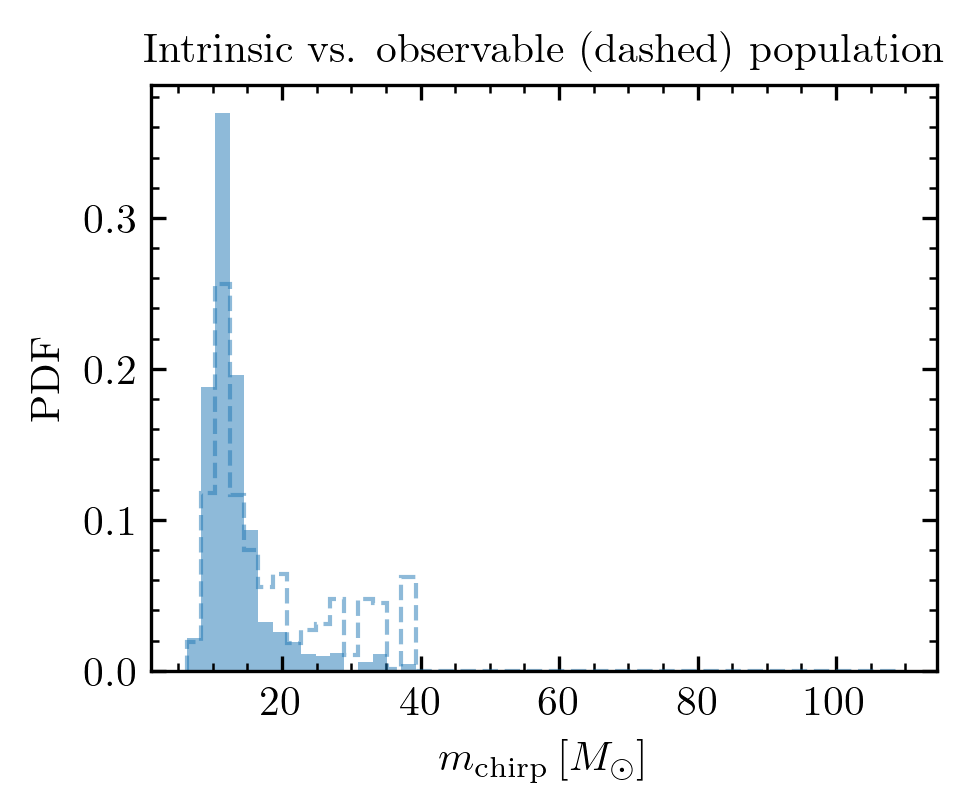

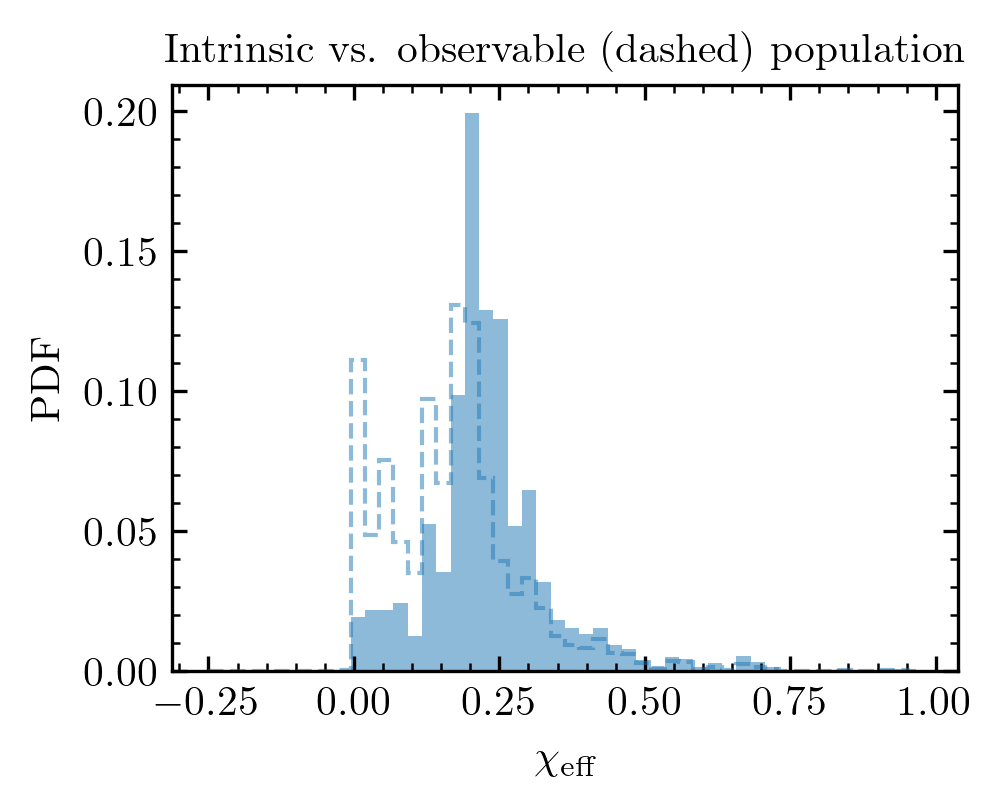

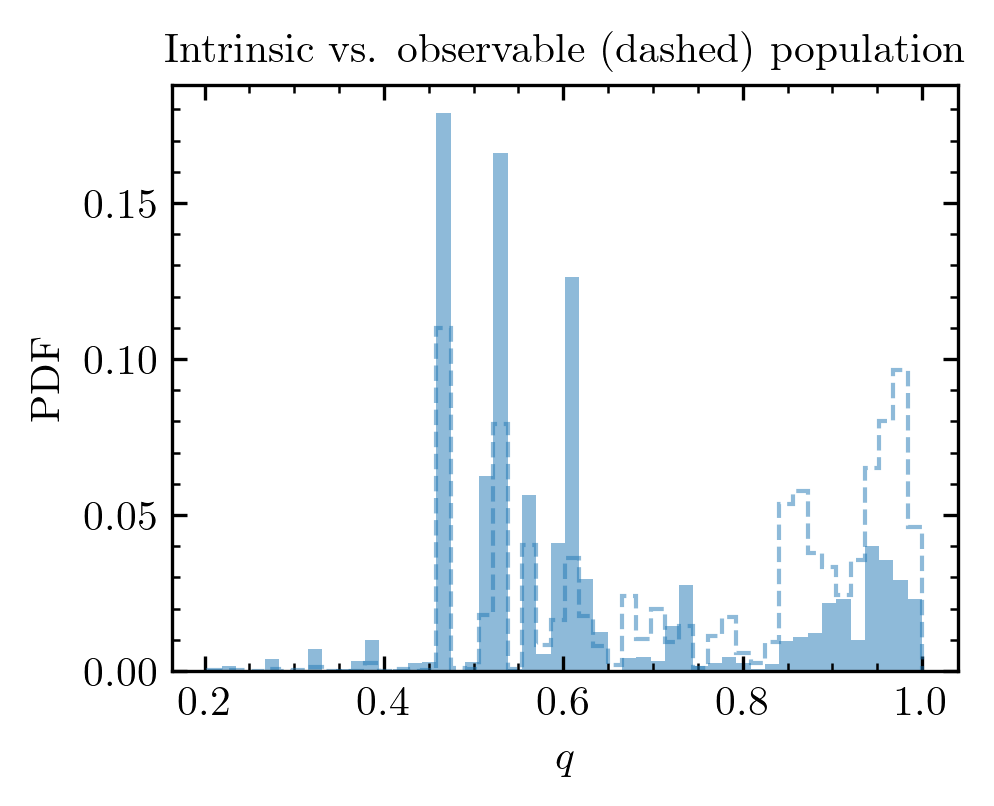

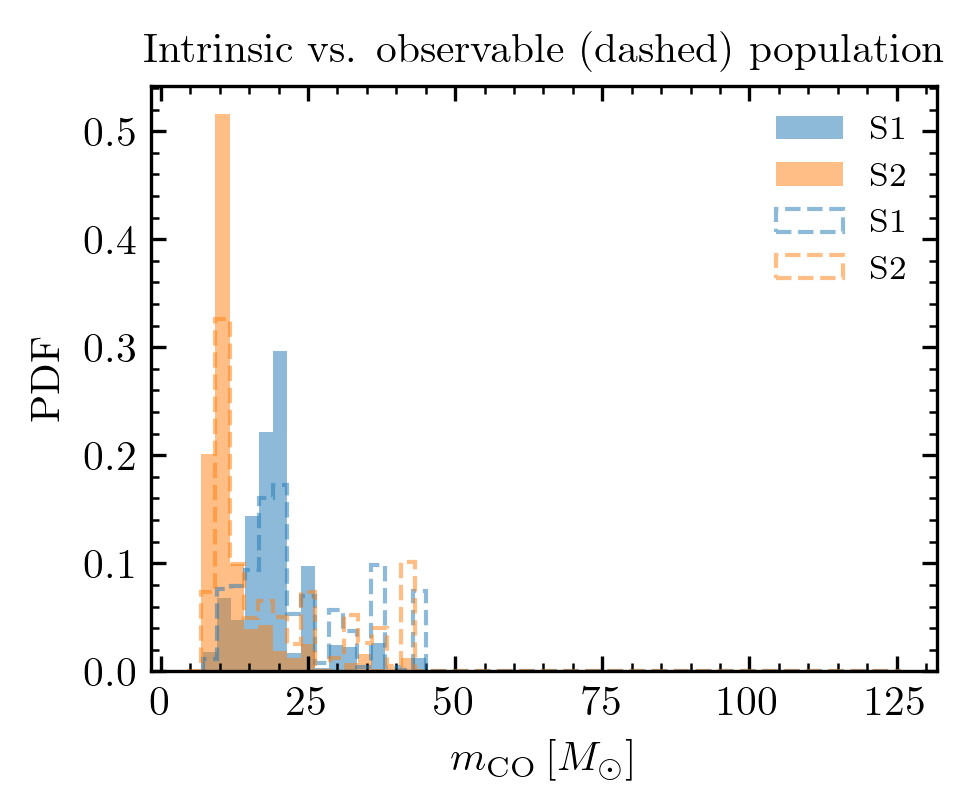

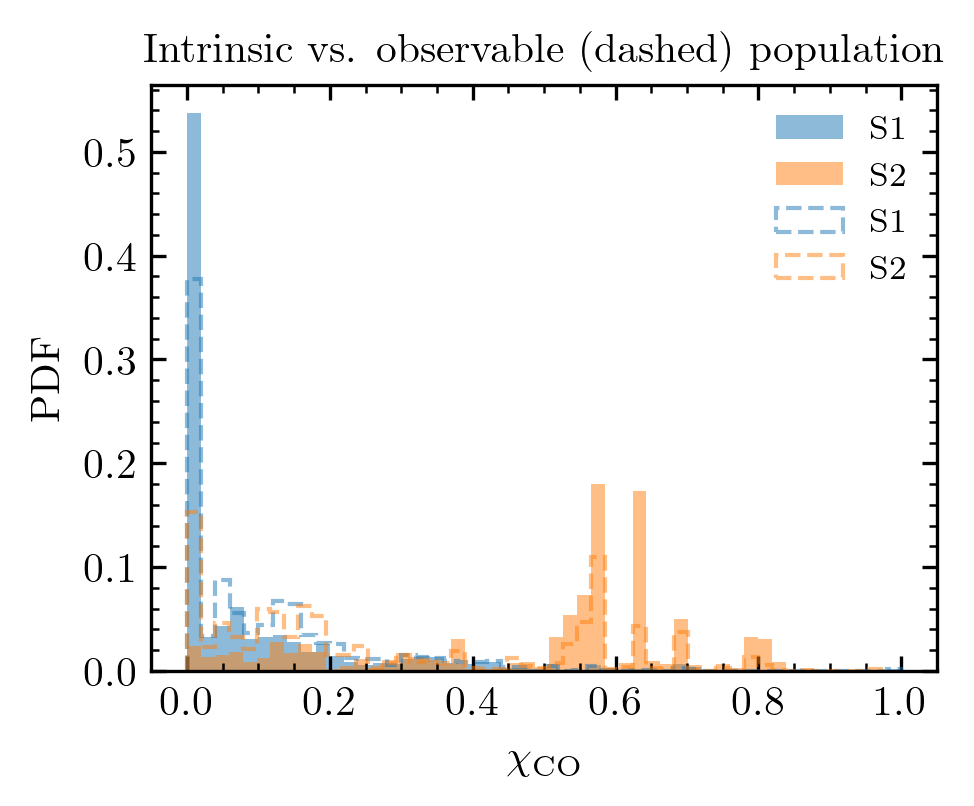

In [8]:
pop.plot_hist_properties('m_chirp', intrinsic=True, observable=True, pop='DCO', bins=50)
pop.plot_hist_properties('chi_eff', intrinsic=True, observable=True, pop='DCO', bins=50)
pop.plot_hist_properties('q', intrinsic=True, observable=True, pop='DCO', bins=50)
pop.plot_hist_properties(['S1_mass','S2_mass'], intrinsic=True, observable=True, pop='DCO', bins=50)
pop.plot_hist_properties(['S1_spin','S2_spin'], intrinsic=True, observable=True, pop='DCO', bins=50)

There exists multiple formation channels that leads to merging BBHs.

In [9]:
# formation channels
pop.df_synthetic['channel'].unique()

array(['ZAMS_oDoubleCE1_CC1_CC2_END', 'ZAMS_oRLO1_CC1_oRLO2_CC2_END',
       'ZAMS_CC1_oRLO2_CC2_END', 'ZAMS_oRLO1-contact_CC1_CC2_END',
       'ZAMS_CC1_CC2_END', 'ZAMS_oRLO1_CC1_CC2_END',
       'ZAMS_oRLO1-reverse_CC1_CC2_END',
       'ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END',
       'ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END',
       'ZAMS_oRLO1-reverse_CC1_oRLO2_oCE2_CC2_END',
       'ZAMS_CC1_oRLO2_oCE2_CC2_END', 'ZAMS_oRLO1-contact_CC2_CC1_END',
       'ZAMS_oRLO1-reverse_CC1_oRLO2_CC2_END',
       'ZAMS_oRLO1-contact_CC1_oRLO2_oCE2_CC2_END'], dtype=object)

Each channel might imprint some obervational sigatures to the properties of merging BBHs. We can visualize the distribution of the intrinsic and observable BBH population as a function of the formation channel. For example let's consider the CE and SMT formation channels and see their spin distribution.

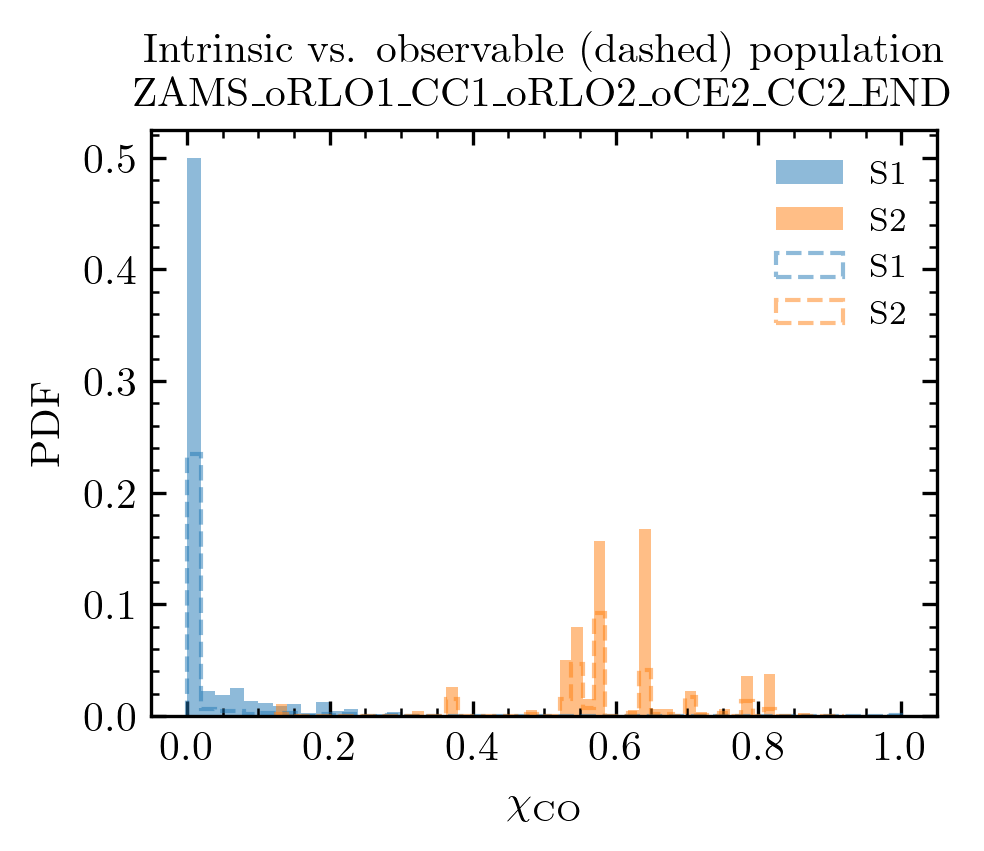

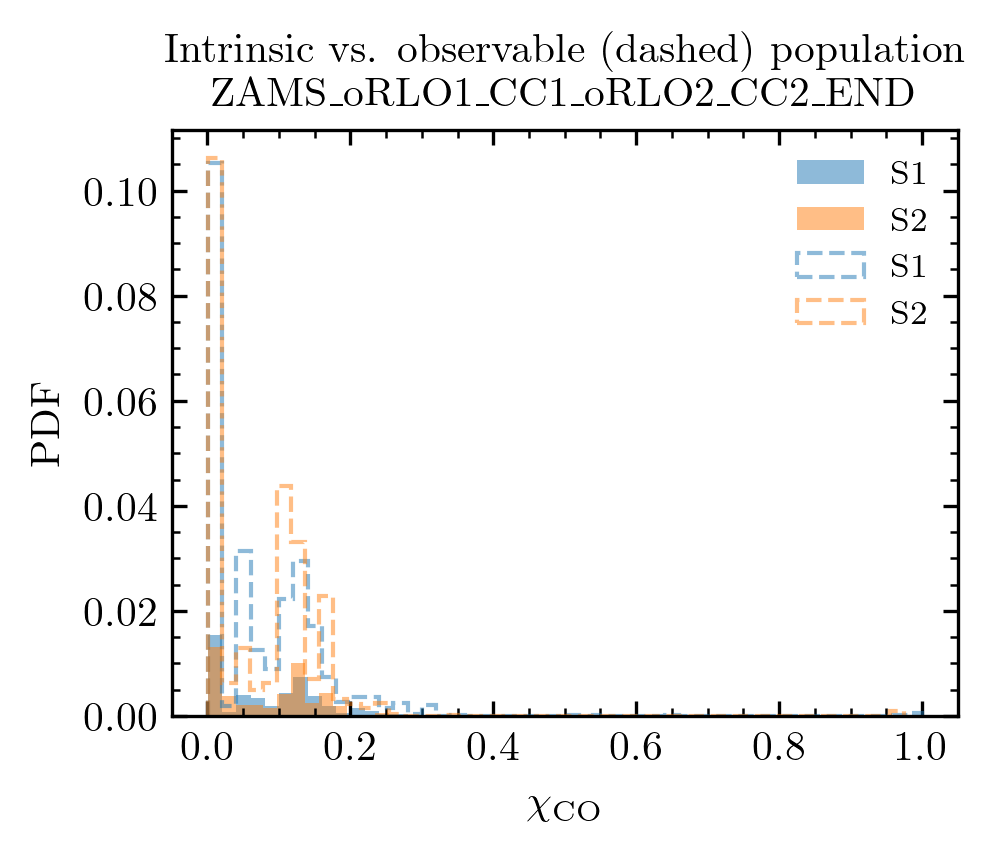

In [10]:
pop.plot_hist_properties(['S1_spin','S2_spin'], intrinsic=True, observable=True, pop='DCO', bins=50, channel='ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END') # CE channel
pop.plot_hist_properties(['S1_spin','S2_spin'], intrinsic=True, observable=True, pop='DCO', bins=50, channel='ZAMS_oRLO1_CC1_oRLO2_CC2_END') # SMT channel

You might want to visualize the portion of the parameter space is the MESA grids that leads to the formation of these BBHs. This can be done as follows.
- select the MESA grid type
- select the metallicity
- select the grid slice (if `None` all grid slices will be plotted entire)
- decide if you want to save the figures and where
- select the channels you want to plot

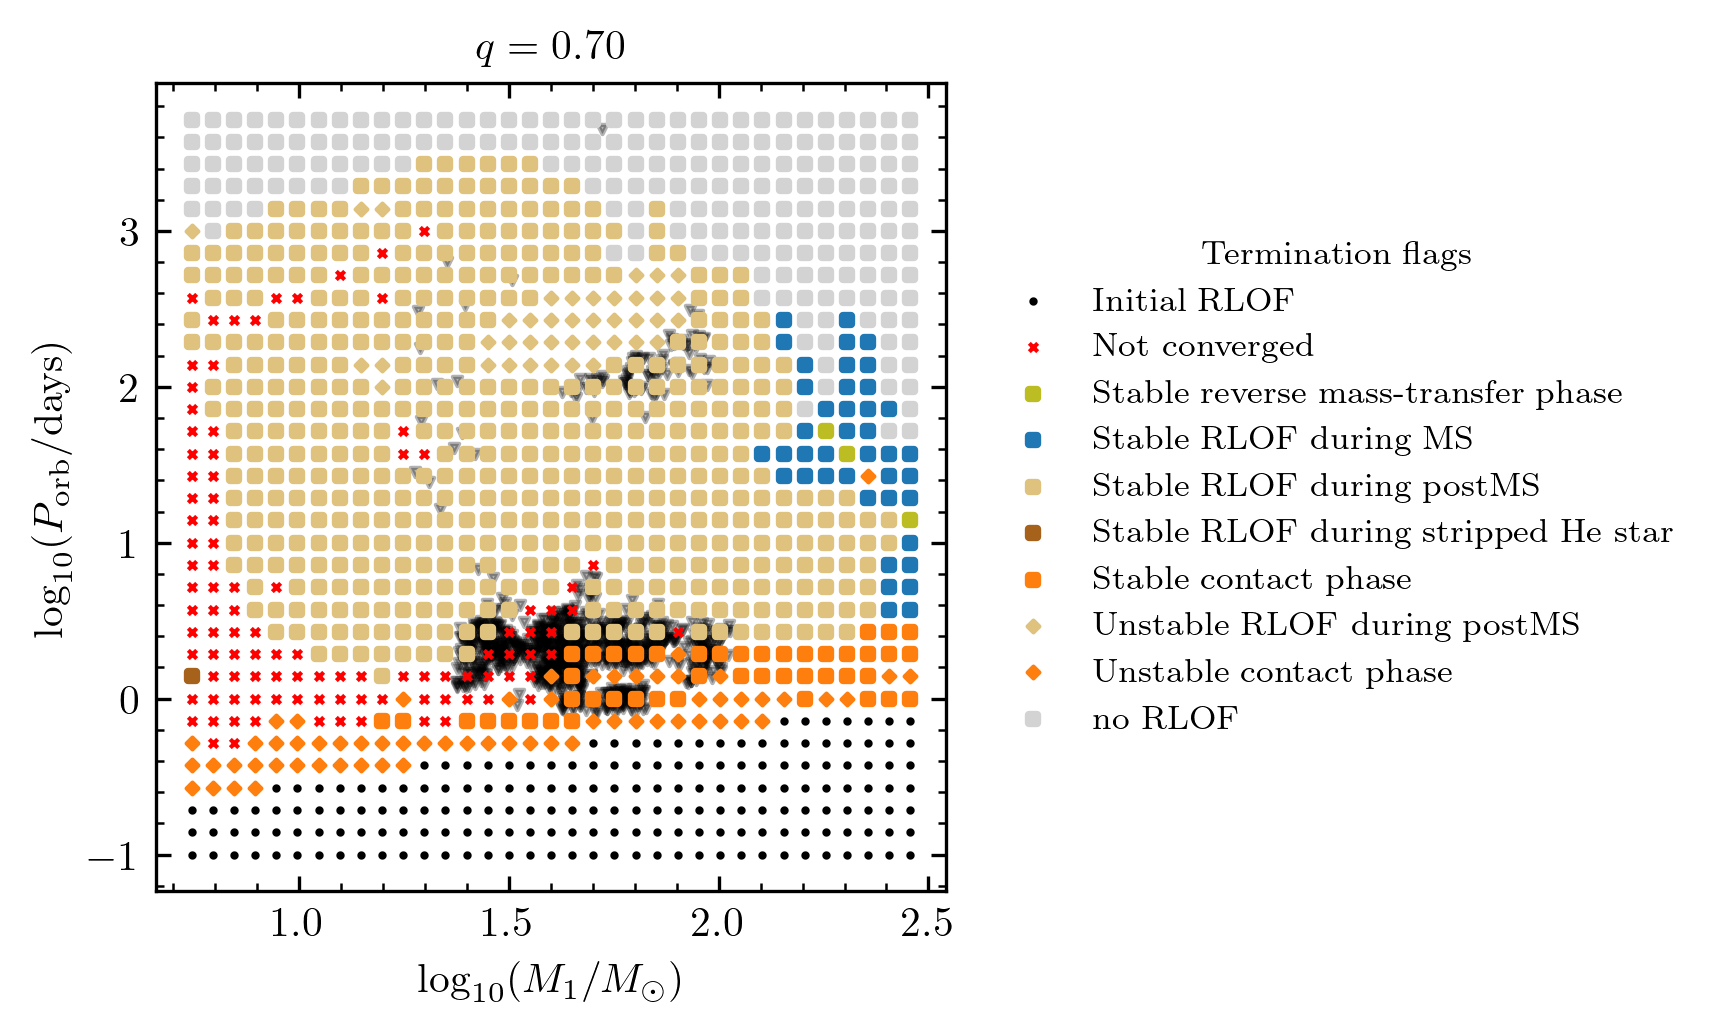

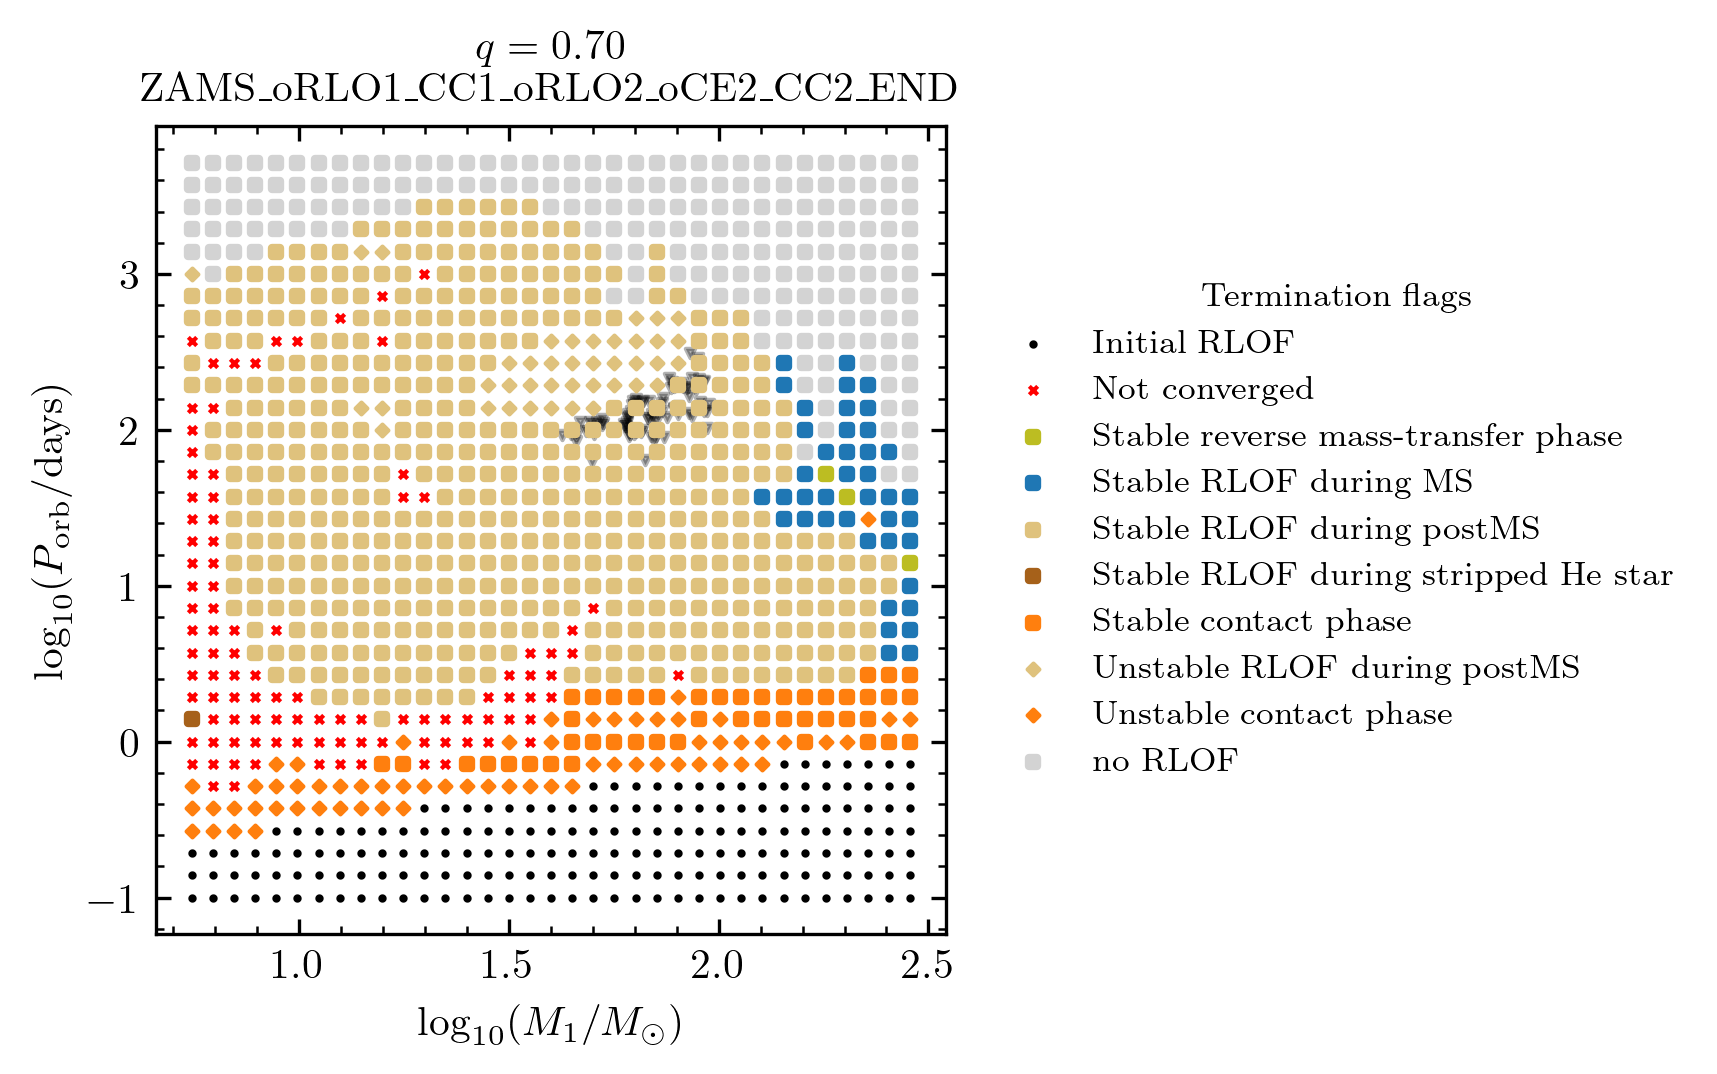

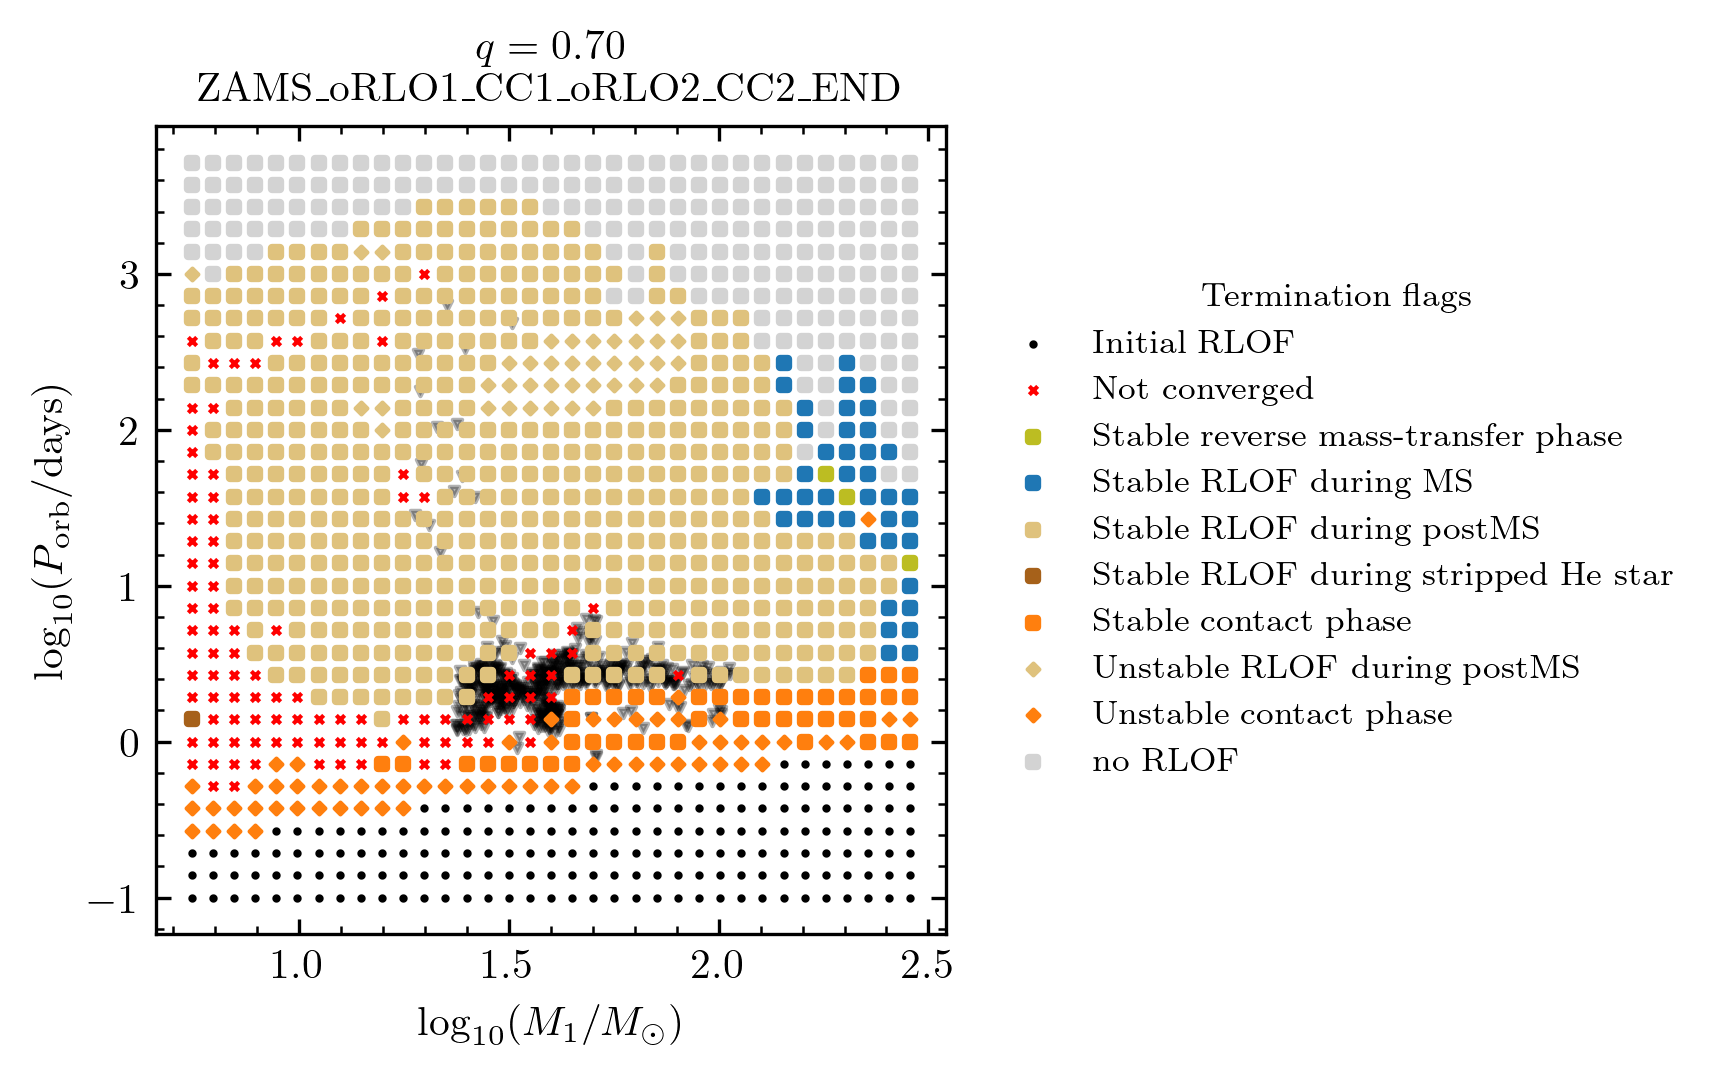

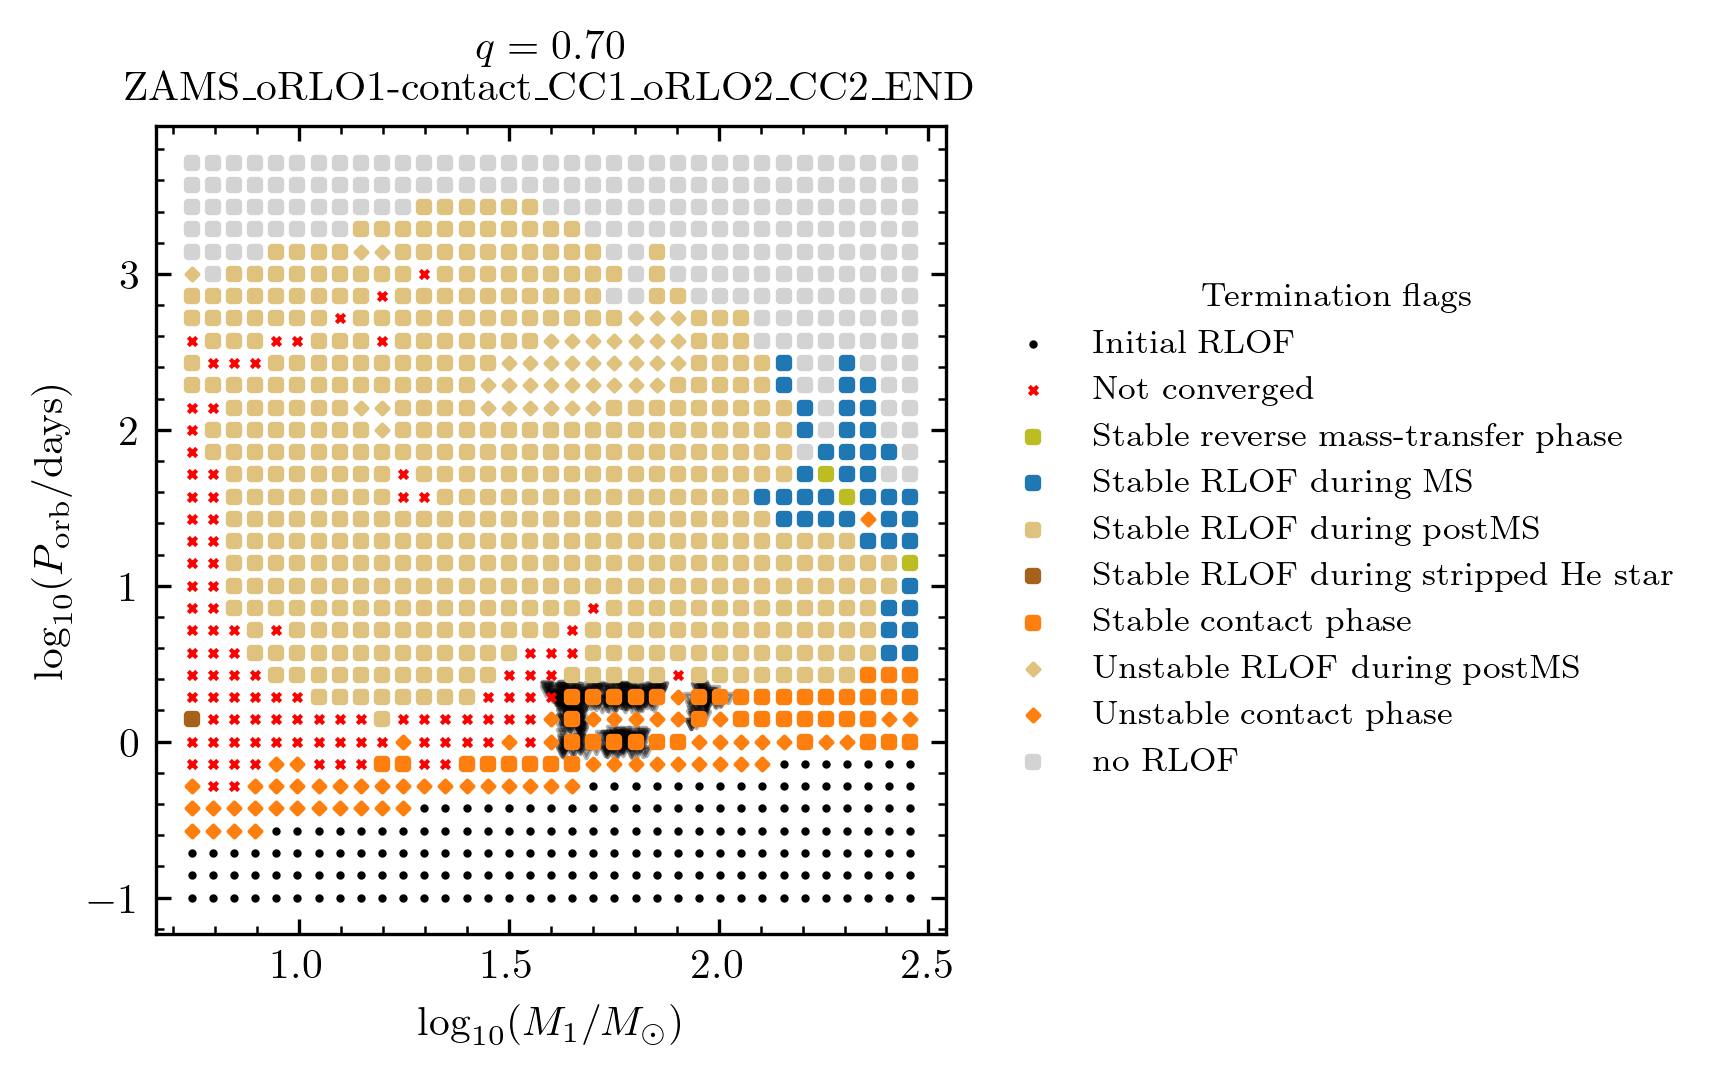

In [12]:
pop.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], save_fig=False) #plot_dir='./plots/'
pop.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], save_fig=False, channel='ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END') # CE channel
pop.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], save_fig=False, channel='ZAMS_oRLO1_CC1_oRLO2_CC2_END') # SMT channel
pop.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], save_fig=False, channel='ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END') # SMT-contact channel

The `plot_popsyn_over_grid_slice` method allows you to display the properties of the merging DCO population as a colormap. Let's display the spin of the first born BH.

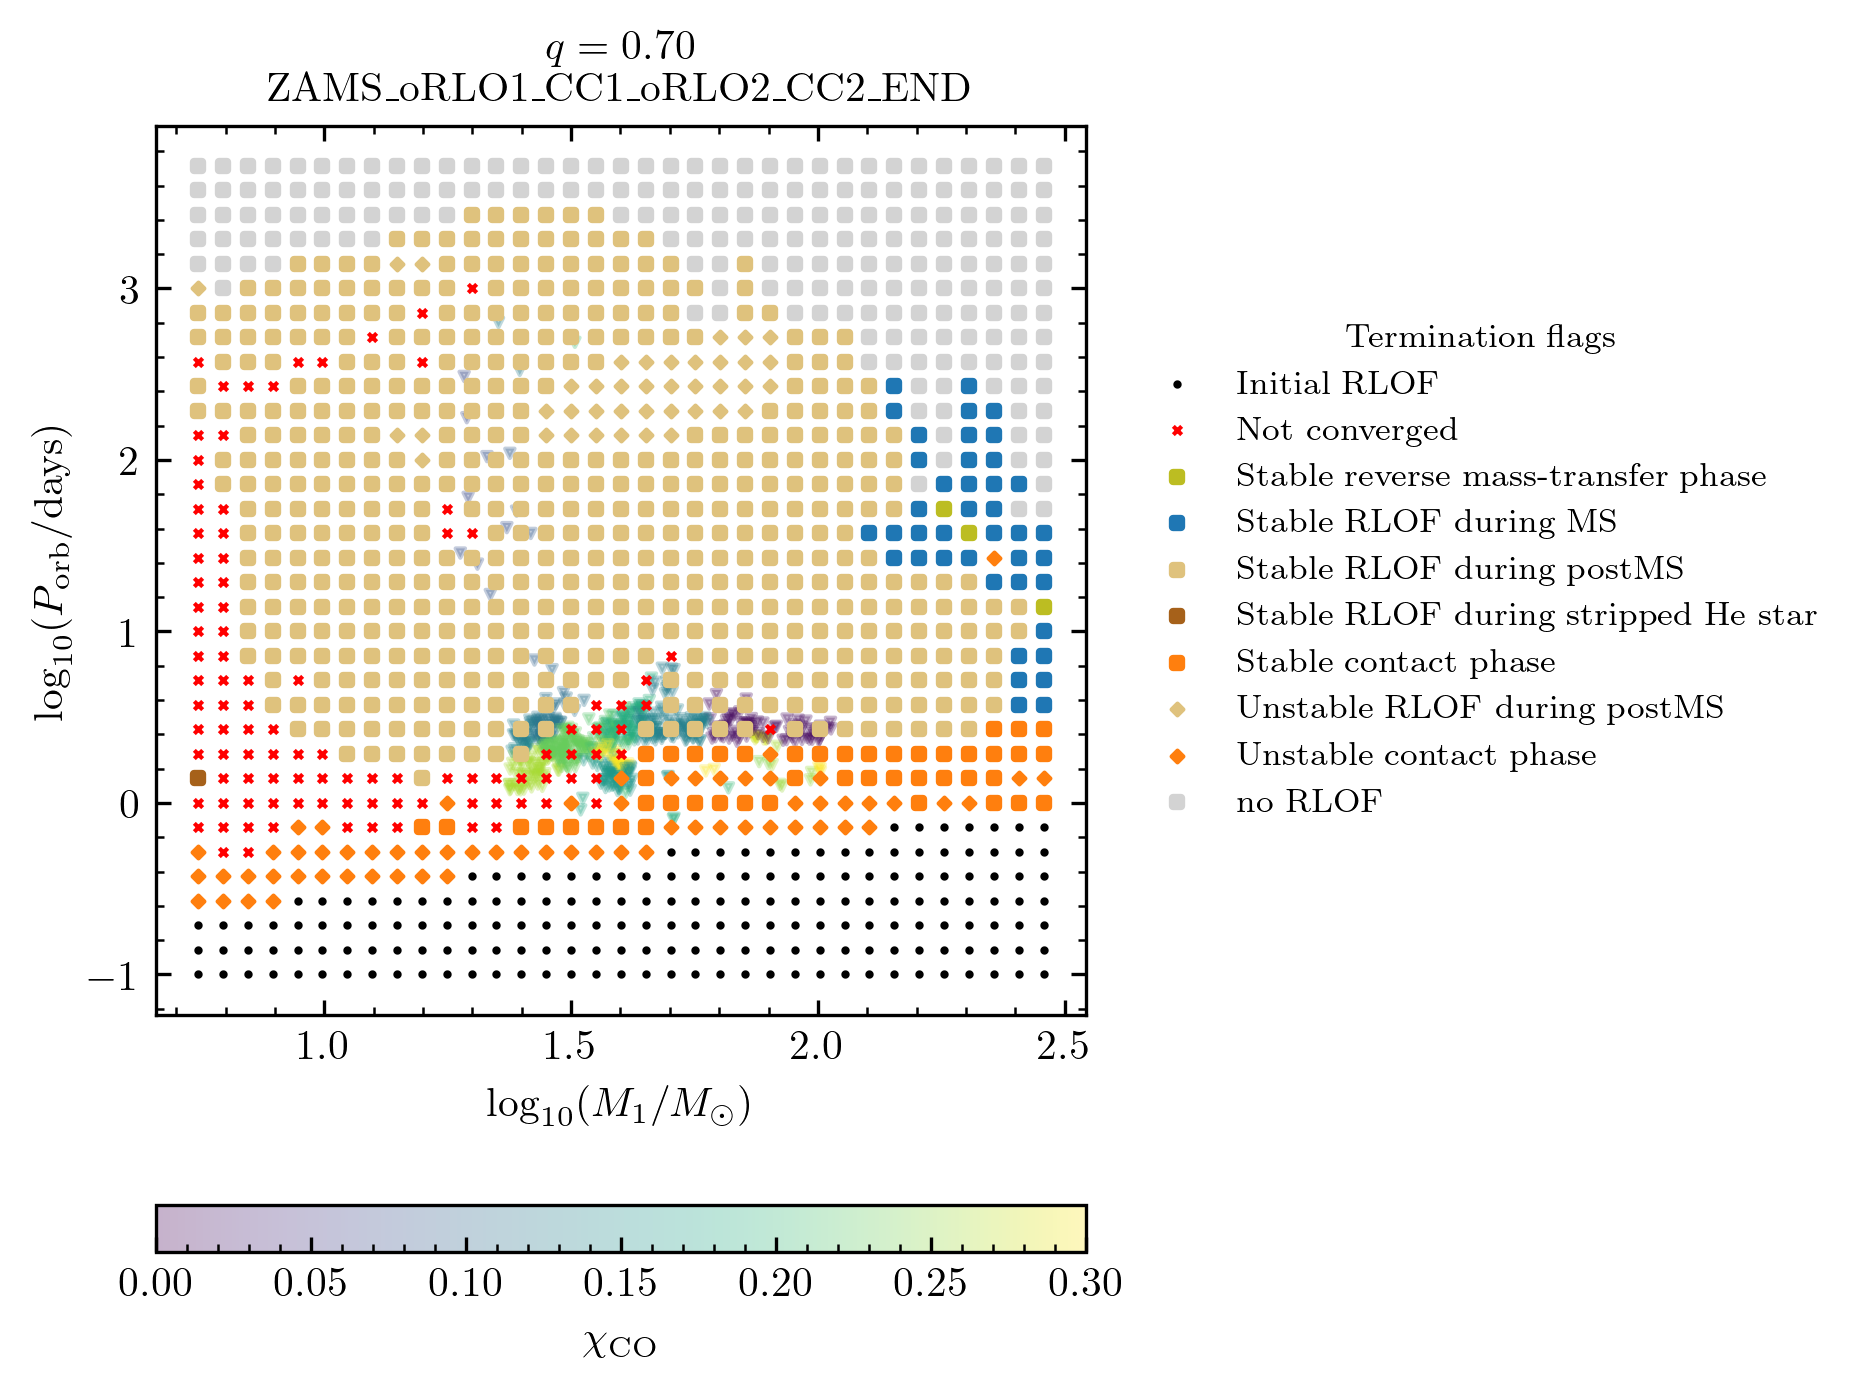

In [13]:
pop.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], prop='S1_spin', prop_range=[0,0.3], save_fig=False, channel='ZAMS_oRLO1_CC1_oRLO2_CC2_END') # SMT channel

Cogratulations, you are now ready to analyze any DCO population data you generated with POSYDON. Feel free to further explore the BBH model or to use this tutorial to study BHNS and BNS populations.